populasi:  [ 2.  -8.5]
respon  :  [25.   30.25]
populasi:  [-3.25  2.  ]
respon  :  [ 0.0625 25.    ]
populasi:  [-3.25  -0.625]
respon  :  [0.0625   5.640625]
populasi:  [-3.25   -1.9375]
respon  :  [0.0625     1.12890625]
populasi:  [-3.25    -2.59375]
respon  :  [0.0625     0.16503906]
populasi:  [-2.921875 -3.25    ]
respon  :  [0.00610352 0.0625    ]
populasi:  [-2.921875  -3.0859375]
respon  :  [0.00610352 0.00738525]
populasi:  [-3.00390625 -2.921875  ]
respon  :  [1.52587891e-05 6.10351562e-03]
populasi:  [-3.00390625 -2.96289062]
respon  :  [1.52587891e-05 1.37710571e-03]
populasi:  [-3.00390625 -2.98339844]
respon  :  [1.52587891e-05 2.75611877e-04]


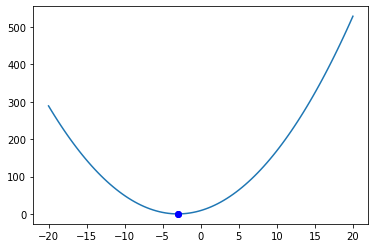

In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot

#havesex merupakan fungsi mate, dimana ia merupakan rata-rata
def havesex(population):
    child   = ( population[0] + population[1] ) / 2
    newpop  = np.append(population,child)
    return newpop

#findresp adalah fungsi kecocokan
def findresp(x):
    return x**2 + 6*x +9

#sort digunakan untuk menngurutkan individu berdasarkan nilai kecocokannya
def sort(input,output):
    for i in range(len(output)):
        lowIndex = i
        for j in range(i+1,len(output)):
            if output[j] < output[lowIndex]:
                lowIndex = j

        output[i],output[lowIndex] = output[lowIndex],output[i]
        input[i],input[lowIndex] = input[lowIndex],input[i]

def mutation():
    y = np.array([np.random.randint(-20,20),np.random.randint(-20,20)])
    return y

#x dan y digunakan untuk menghasilkan plot fungsi, hanya untuk mempermudah pemahaman saja
x = np.linspace(-20,20,100)
y = findresp(x)

#fungsi plot, tidak mesti ada
""""
pyplot.ion()
fig = pyplot.figure()
ax = fig.add_subplot(111)"""

###### . . . MAIN . . . #######

#numGeneration mengatur jumlah iterasi yang akan dilakukan

numGeneration = 10

#memasukkan individu-individu awal
population = np.array([-19,2])

for c in range(numGeneration):
    #mate and make child
    population = havesex(population)
    #print(population)

    #find population response
    response = findresp(population)
    #print(response)

    #sort
    sort(population,response)
    #print(population)
    #print(response)

    #kill the unfits (in this case just the biggest)
    population = np.delete(population,len(population)-1)
    response   = np.delete(response,len(response)-1)
    print("populasi: ",population)
    print("respon  : ",response)

    #plotting
    """
    ax.clear()
    line1, = ax.plot(x,y)
    line2, = ax.plot(population,response,'bo')
    fig.canvas.draw()"""

    #conditional mutation, if there's no solution for a long time
    """
    if (response[0]>1e-5 and response[1]>1e-5 and c>10 and c%10==5):
        population = mutation()
    """
    
    #looooooopbreaak
    if(response[0]<1e-10):
        break

pyplot.plot(x,y)
pyplot.plot(population,response,'bo')
pyplot.show()